In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_regression, mutual_info_regression

In [2]:
# Carga de datos.
np.random.seed(42)
X = np.random.rand(1000, 3)
print(X)
print(np.shape(X))                #Generamos un df aleatorio

[[0.37454012 0.95071431 0.73199394]
 [0.59865848 0.15601864 0.15599452]
 [0.05808361 0.86617615 0.60111501]
 ...
 [0.80000348 0.55270708 0.39655368]
 [0.13171503 0.86529576 0.15727321]
 [0.30978786 0.29004553 0.87141403]]
(1000, 3)


In [5]:
# Definimos la etiqueta (target, ground truth) haciéndola dependiente de las características x1 y x2

y = X[:, 0] + np.sin(6 * np.pi * X[:, 1]) + 0.1 * np.random.randn(1000)

# La etiqueta toma el valor d ela columna 1 le añade una frecuencia 6*pi * columna 2 + 0.1 * ruido aleatorio

#print(y)

In [11]:
# Evaluación de atributos: F-Test.
f_test, _ = f_regression(X, y) # Llamamos al estadístico F, daria dos valores de salida F-Values y P-Values
                            # a mayor F-Value mas varia (y) en funcion de (Xi) la(_) hace que no salga el segundo output (P-Value)
    
f_test /= np.max(f_test)    # Normalizamos

print(f_test)     # CORRELACION LINEAL

[1.         0.61890197 0.00108759]


In [12]:
# Evaluación de atributos: información mutua.
mi = mutual_info_regression(X, y)
# mi:Contiene los valores de información mutua para cada característica en X con respecto a y.
# Los valores en mi indican cuánta información o dependencia hay entre cada Xi y el vector objetivo (y).
# Cuanto mayor sea el valor en mi, mayor será la dependencia o la cantidad de información compartida entre (Xi) e (y).
mi /= np.max(mi)

print(mi)        #CORRELACIONES NO LINEALES

[0.28440919 1.         0.00411266]


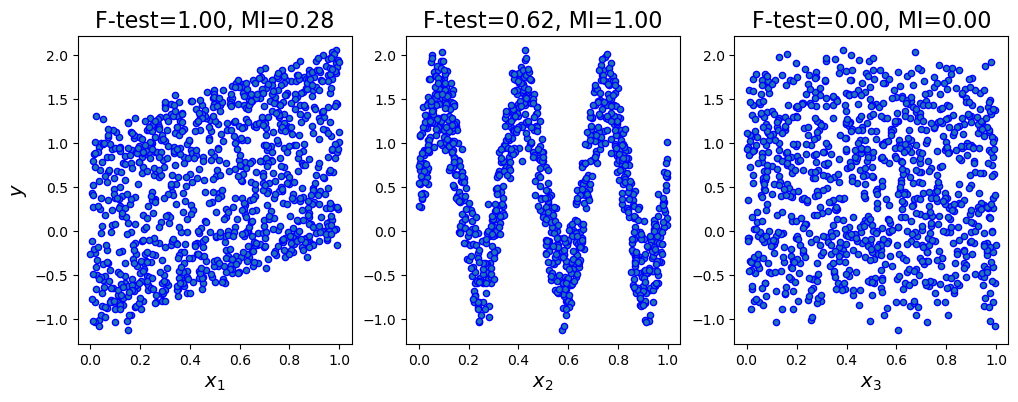

In [16]:
# Graficamos la distribución de los datos y evaluación de atributos.
plt.figure(figsize=(12, 4))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.scatter(X[:, i], y, edgecolor='blue', s=20)
    plt.xlabel("$x_{}$".format(i + 1), fontsize=14)
    if i == 0:
        plt.ylabel("$y$", fontsize=14)
    plt.title("F-test={:.2f}, MI={:.2f}".format(f_test[i],
              mi[i]), fontsize=16)
plt.show()

Se puede observar la dependencia lineal con respecto $x1$ y la dependencia sinusoidal con $x2$

- RecursiveFeatureElimination
- SelectkBest